### Introduction to Simple Linear Regression

Simple Linear Regression is a fundamental statistical method used to study the relationship between two continuous (quantitative) variables:
- **Dependent variable (Y)**: The variable we want to predict or explain.
- **Independent variable (X)**: The variable used to predict the dependent variable.

It assumes a linear relationship between X and Y, where changes in X are associated with changes in Y by a straight-line relationship. This method is essential for understanding how one variable changes with respect to another and serves as the foundation for more complex regression techniques in statistics and machine learning.


### Derivation of Ordinary Least Squares (OLS) Regression

#### Assumptions:
1. **Linearity**: The relationship between \( X \) and \( Y \) is linear.
2. **Independence**: Observations are independent of each other.
3. **Normality**: Residuals (errors) are normally distributed with mean 0.
4. **Homoscedasticity**: The variance of residuals is constant across all levels of \( X \).

#### Model:
The simple linear regression model is defined as:
$$ Y = \beta_0 + \beta_1 X + \epsilon $$

Where:
- \( Y \): Dependent variable
- \( X \): Independent variable
- $( \beta_0 )$: Intercept (constant term)
- $( \beta_1 )$: Slope (coefficient of \( X \))
- $( \epsilon )$: Error 


#### Objective:
To find the coefficients $( \beta_0 )$ and $( \beta_1 )$ that minimize the sum of squared residuals $( \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1 X_i))^2 )$.

#### Derivation:

1. **Objective Function**: Define the residual sum of squares (RSS):
   $$ \text{RSS} = \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1 X_i))^2 $$

2. **Minimization**: To find $( \beta_0 )$ and $( \beta_1 )$ that minimize RSS, take the partial derivatives with respect to \( \beta_0 \) and \( \beta_1 \), set them to zero, and solve for $( \beta_0 )$ and $( \beta_1 )$.

   - Partial derivative w.r.t $( \beta_0 )$:
     $$ \frac{\partial \text{RSS}}{\partial \beta_0} = -2 \sum_{i=1}^{n} (Y_i - \beta_0 - \beta_1 X_i) = 0 $$
     $$ \Rightarrow \beta_0 = \bar{Y} - \beta_1 \bar{X} $$

   - Partial derivative w.r.t $( \beta_1 )$:
     $$ \frac{\partial \text{RSS}}{\partial \beta_1} = -2 \sum_{i=1}^{n} X_i (Y_i - \beta_0 - \beta_1 X_i) = 0 $$
     $$ \Rightarrow \beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2} $$

   Where:
   - $( \bar{Y} )$ and $( \bar{X} )$ are the means of \( Y \) and \( X \), respectively.

3. **Final Estimates**: After substituting $( \beta_0 )$:
   $$ \hat{\beta}_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2} $$
   $$ \hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X} $$

<hr>


### Derivation of Simple Linear Regression in Matrix Form

#### Model:
The simple linear regression model is defined as:
$$ Y = \beta_0 + \beta_1 X + \epsilon $$

Where:
- \( Y \): Vector of dependent variables (size $( n \times 1 )$)
- \( X \): Matrix of independent variables (size $( n \times (p+1) )$)
- $( \beta )$: Vector of coefficients, including intercept $( \beta = [\beta_0, \beta_1]^T )$ (size $( (p+1) \times 1 )$)
- $( \epsilon )$: Vector of errors or residuals (size $( n \times 1 )$)

#### Objective:
To find the coefficients $( \beta )$ that minimize the sum of squared residuals $( \text{RSS} )$:
$$ \text{RSS} = (Y - X\beta)^T (Y - X\beta) $$

#### Derivation:

1. **Objective Function**: Rewrite the RSS in matrix form:
   $$ \text{RSS} = (Y - X\beta)^T (Y - X\beta) $$

2. **Minimization**: To minimize RSS, take the derivative with respect to $( \beta )$ and set it to zero:
   $$ \frac{\partial \text{RSS}}{\partial \beta} = -2X^T(Y - X\beta) = 0 $$

3. **Solve for $( \beta )$**:
   $$ X^T Y = X^T X \beta $$

4. **Final Estimate for $( \beta )$**:
   $$ \hat{\beta} = (X^T X)^{-1} X^T Y $$

Where:
- $( X^T )$: Transpose of matrix \( X \)
- $( (X^T X)^{-1} )$: Inverse of the matrix $( X^T X )$

This formula gives us the Ordinary Least Squares (OLS) estimate for the coefficients $( \beta )$ in the simple linear regression model. It represents the vector of coefficients that minimizes the sum of squared residuals between the observed and predicted values of \( Y \).


<hr><hr>

## Creating the model from Scratch

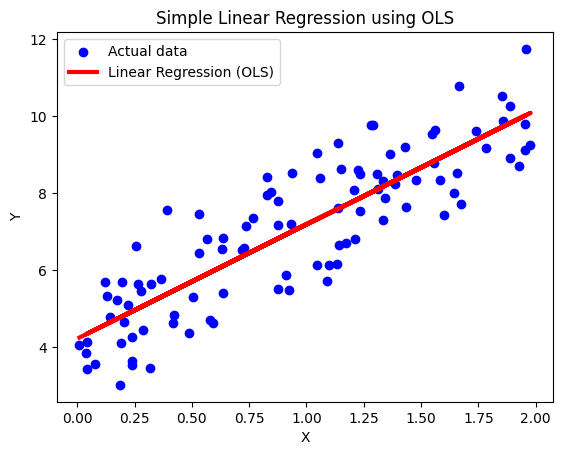

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Generating some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

# Implementing Simple Linear Regression with OLS
class SimpleLinearRegressionOLS:
    def fit(self, X, Y):
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate([ones, X], axis=1)
        # Equation 4 from matrix derivation
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    
    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate([ones, X], axis=1)
        return X @ self.beta
    
# Training the model
model = SimpleLinearRegressionOLS()
model.fit(X, Y)

# Predicting
Y_pred = model.predict(X)

# Plotting the results
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', linewidth=3, label='Linear Regression (OLS)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression using OLS')
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import r2_score
# Calculating R-squared (Coefficient of determination)
accuracy = r2_score(Y, Y_pred)

# Displaying the accuracy
print(f"Accuracy (R-squared): {accuracy}")

Accuracy (R-squared): 0.7469629925504755


<hr><hr>

## Creating the model using Scikit-Learn (sklearn)

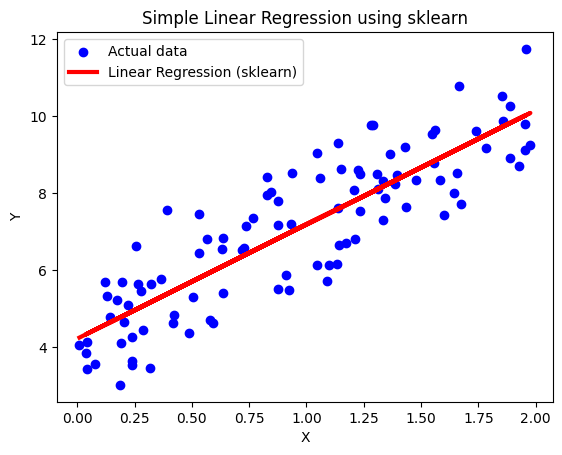

In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generating some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model
model.fit(X, Y)

# Predicting
Y_pred = model.predict(X)

# Plotting the results
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', linewidth=3, label='Linear Regression (sklearn)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression using sklearn')
plt.legend()
plt.show()


In [4]:
from sklearn.metrics import r2_score
# Calculating R-squared (Coefficient of determination)
accuracy = r2_score(Y, Y_pred)

# Displaying the accuracy
print(f"Accuracy (R-squared): {accuracy}")

Accuracy (R-squared): 0.7469629925504755


### Conclusion

In this example, we explored Simple Linear Regression using both a custom implementation and the `sklearn` library. Here are the key takeaways:

- **Model Understanding**: Simple Linear Regression aims to model the relationship between a single independent variable \( X \) and a dependent variable \( Y \) using a linear equation $( Y = \beta_0 + \beta_1 X + \epsilon )$, where $( \beta_0 )$ and $( \beta_1 )$ are coefficients and $( \epsilon )$ represents the error term.

- **Implementation**: We implemented Simple Linear Regression using Ordinary Least Squares (OLS) method. This involved deriving the coefficients manually and also using the `LinearRegression` class from `sklearn` for comparison.

- **Results**: Both implementations provided similar results, demonstrating how to fit the model to data, make predictions, and visualize the relationship between \( X \) and \( Y \).

- **Visualization**: We visualized the fitted regression line against the actual data points, showing how well the model fits the observed data.

Simple Linear Regression is a fundamental technique in statistical learning and serves as a basis for more complex regression models. It is valuable for understanding and predicting relationships between variables when the relationship appears to be linear.
